### DDM decision time model.

In this problem, you will construct response time distributions from a diffusion model. Consider the basic diffusion model

$$ dx = v dt + \sigma dw $$

with initial condition $x(0) = 0$ and thresholds at $\pm a$. For these simulations, we will use $(v,\sigma, a) = (1.0, 2.0, 2.0)$.

1) For these model parameters, simulate three trajectories. Plot each of the trajectories in (x,t) space and overlay horizontal lines illustrating the upper and lower boundaries ($\pm a$).

2) Write a small function that takes in a full time trajectory and finds is first passage time and boundary. That is, find which boundary that the trajectory crosses (and record it) as well as the time at which that crossing occurs. These are the choice and response time for that trajectory.

3) Simulate 10_000 trajectories and collect the choices and response time associated with each simulation. Run your simulations for t=5 time units. Note that some of these trajectories may never reach either boundary. This is ok, just ignore them.

4) Plot a histogram showing the response times assoicated with each of the two boundaries (two histograms).

5) Calculate the fraction of responses that are found for each response. These are "choice proportions".

In [2]:
using Pkg
Pkg.status()

using LinearAlgebra, Plots, Statistics
using DifferentialEquations

Status `~/.julia/environments/v1.10/Project.toml`


  [0c46a032] DifferentialEquations v7.13.0
  [91a5bcdd] Plots v1.40.4
  [2913bbd2] StatsBase v0.34.3


In [3]:
### Simulate
u0 = [0.0];
params = [1.0, 2.0];
threshold = 2.0;
tspan = (0.0,5.0);

# Solve the problem three times and plot.

(0.0, 5.0)

In [4]:
using Random
Pkg.add("StatsBase")
using StatsBase
using Plots

# Define the diffusion model function
function drift_diffusion_model(v, σ, a, T)
    dt = 0.01
    t = 0.0
    x = 0.0
    
    while abs(x) < a && t < T
        x += v * dt + σ * sqrt(dt) * randn()
        t += dt
    end
    
    if abs(x) >= a
        return t, sign(x) * a
    else
        return NaN, NaN  # Return NaN if the threshold is not reached
    end
end

# Simulate trajectories and collect choice and response time
function simulate_trajectories(v, σ, a, T, num_trajectories)
    choices = Vector{Float64}()
    response_times = Vector{Float64}()
    
    for _ in 1:num_trajectories
        t, choice = drift_diffusion_model(v, σ, a, T)
        if !isnan(t)
            push!(choices, choice)
            push!(response_times, t)
        end
    end
    
    return choices, response_times
end

# Model parameters
v = 1.0
σ = 2.0
a = 2.0
T = 5.0
num_trajectories = 10_000

# Simulate trajectories and collect choices and response times
choices, response_times = simulate_trajectories(v, σ, a, T, num_trajectories)



# Calculate choice proportions
choice_proportion_a = count(x -> x == a, choices) / num_trajectories
choice_proportion_minus_a = count(x -> x == -a, choices) / num_trajectories
println("Choice Proportion for a: ", choice_proportion_a)
println("Choice Proportion for -a: ", choice_proportion_minus_a)


    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Choice Proportion for a: 0.7487
Choice Proportion for -a: 0.2482


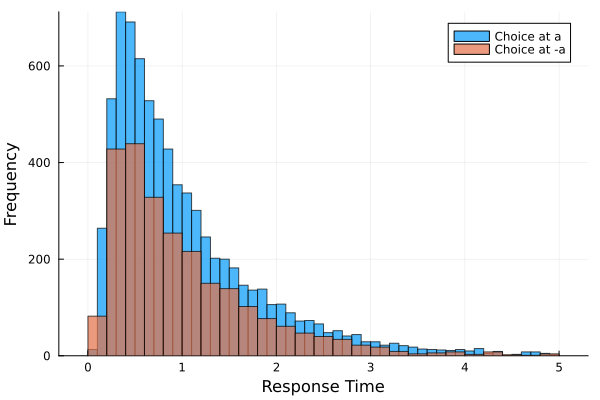

In [6]:
histogram(response_times[choices .== a], label="Choice at a", xlabel="Response Time", ylabel="Frequency", alpha=0.7)
histogram!(response_times[choices .== -a], label="Choice at -a", alpha=0.7)
